## Replicating 'Why Most People Disapprove of Me : Experience Sampling in Impression Formation'

Denrell, Jerker. 2005. “Why Most People Disapprove of Me : Experience Sampling in Impression Formation.” Psychological Review 112(4):951–78.

October 2017

In [2]:
%pylab inline
import numpy as np
from scipy.stats import gaussian_kde

Populating the interactive namespace from numpy and matplotlib


In [3]:
weight = .1  
baseline = 0  
sensitivity = 3  

def p_interact(
        belief, 
        weight=.1,  # called 'b'
        baseline=0,  # called 'c'
        sensitivity=3, # called 'S'
        forcing=0,  # called 'r'
    ):
    return (forcing + (1-forcing) *
            np.exp(baseline + sensitivity * belief) / 
            (1 + np.exp(baseline + sensitivity * belief)))

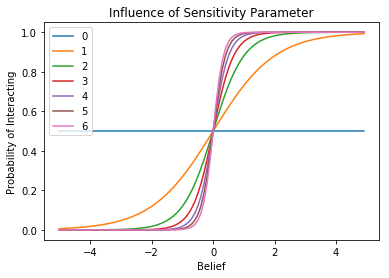

In [4]:
x = np.arange(-5,5,.1)

for S in range(7):
    p = np.vectorize(p_interact)(x, sensitivity=S)
    plt.plot(x, p)
plt.xlabel('Belief')
plt.ylabel('Probability of Interacting')
plt.legend(range(7))
plt.title('Influence of Sensitivity Parameter');

In [13]:
def sim(weight=.1,  # called 'b'
        baseline=0,  # called 'c',
        sensitivity=3,  # called 'S'
        forcing=0,  # called 'r'
        steps=10,
    ):
    beliefs = [0]
    observations = []
    for t in range(steps):
        old_belief = beliefs[-1]
        p=p_interact(old_belief, weight, baseline, sensitivity, forcing)
        interact = np.random.binomial(1, p)
        if interact==1 or t==0:
            observation = np.random.normal(loc=0, scale=1)
            observations.append(observation)
            new_belief = (1-weight)*old_belief + weight*observation
            beliefs.append(new_belief)
        else:
            beliefs.append(old_belief)
            
    return beliefs

# Sensitivity = 3

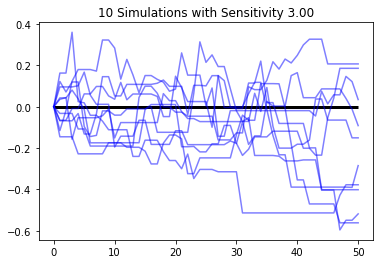

In [6]:
n_sims = 10
S = 3
ends = []
for _ in range(n_sims):
    res = sim(steps=50, sensitivity=S)
    plt.plot(res, 'b', alpha=.5)
plt.title('%i Simulations with Sensitivity %.02f' % (n_sims, S))
plt.hlines(0, 0, 50, 'k', linewidth=3, alpha=1);

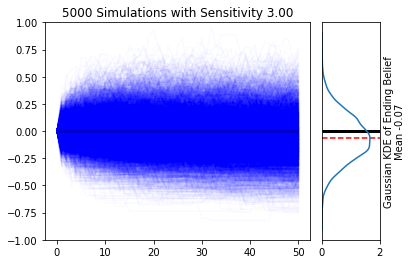

In [14]:
n_sims = 5000
S = 3
ends = []
plt.subplot2grid((1,5), (0,0), 1, 4)
for _ in range(n_sims):
    res = sim(steps=50, sensitivity=S)
    ends.append(res[-1])
    plt.plot(res, 'b', alpha=.02)
plt.title('%i Simulations with Sensitivity %.02f' % (n_sims, S))
plt.hlines(0, 0, 50, 'k', linewidth=3, alpha=1)
plt.ylim(-1, 1)

ax = plt.subplot2grid((1,5), (0,4), 1, 1)
density = gaussian_kde(ends)
xs = np.linspace(-1,1,200)
plt.plot(density(xs), xs)
plt.hlines(0,2,0, 'k', linewidth=3, alpha=1)
plt.yticks([])
plt.hlines(np.mean(ends), 0, 2, 'r', linestyles='dashed')
plt.xlim(0,2)
plt.ylabel('Gaussian KDE of Ending Belief\nMean %.02f' % np.mean(ends))
ax.yaxis.set_label_position("right")



# Sensitivity = 7

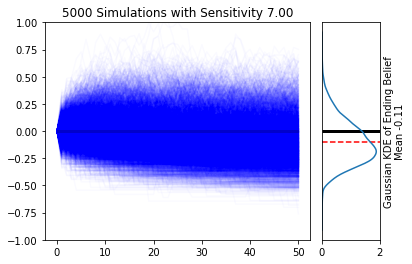

In [17]:
n_sims = 5000
S = 7
ends = []
plt.subplot2grid((1,5), (0,0), 1, 4)
for _ in range(n_sims):
    res = sim(steps=50, sensitivity=S)
    ends.append(res[-1])
    plt.plot(res, 'b', alpha=.02)
plt.title('%i Simulations with Sensitivity %.02f' % (n_sims, S))
plt.hlines(0, 0, 50, 'k', linewidth=3, alpha=1)
plt.ylim(-1, 1)

ax = plt.subplot2grid((1,5), (0,4), 1, 1)
density = gaussian_kde(ends)
xs = np.linspace(-1,1,200)
plt.plot(density(xs), xs)
plt.hlines(0,2,0, 'k', linewidth=3, alpha=1)
plt.hlines(np.mean(ends), 0, 2, 'r', linestyles='dashed')
plt.yticks([]);
plt.xlim(0,2)
plt.ylabel('Gaussian KDE of Ending Belief\nMean %.02f' % np.mean(ends))
ax.yaxis.set_label_position("right")

# As a function of forcing

In [82]:
n_sims = 100000

estimates = []
rs = np.linspace(0,1,20)
for r in rs:
    estimates.append(np.mean([sim(steps=10, weight=.5, forcing=r)[-1] for _ in range(n_sims)]))

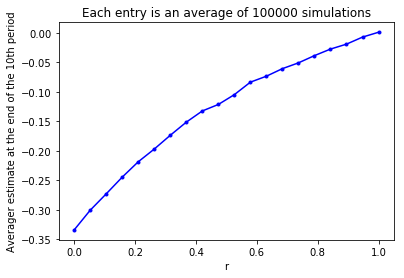

In [87]:
plt.plot(rs, estimates, 'b.-')
plt.xlabel('r')
plt.ylabel('Averager estimate at the end of the 10th period')
plt.title('Each entry is an average of %i simulations' % n_sims);